In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from loguru import logger

In [3]:
import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')


import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

import sctk

In [4]:
import os

os.chdir('/home/mowp/workspace/single_cell_analysis')

In [5]:
sc.set_figure_params(figsize=(3, 3))

In [6]:
infile = '/data/user/mowp/workspace/single_cell_analysis/single-cell-best-practics/dataset/s4d8_normalization.h5ad'
adata = sc.read(infile)

In [7]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

In [8]:
adata.X = adata.layers['log1p_norm']

In [9]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=2000)

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [10]:
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

In [11]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

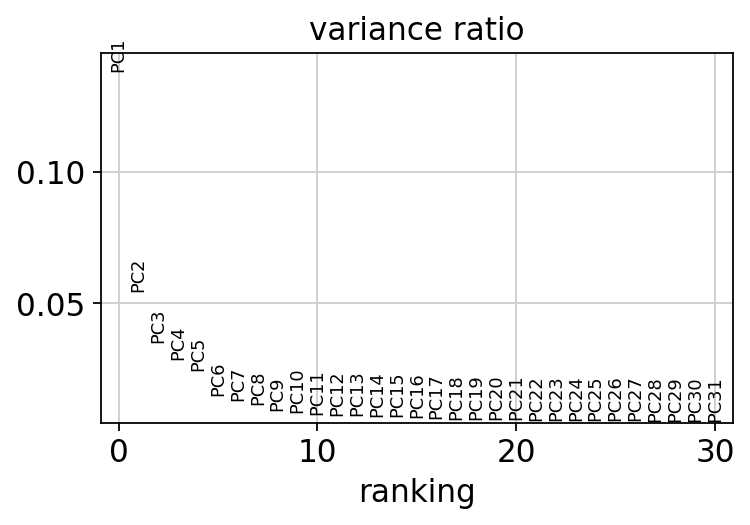

In [12]:
with plt.rc_context({"figure.figsize": (5, 3)}):
    sc.pl.pca_variance_ratio(adata)

In [13]:
sc.pp.neighbors(adata, n_pcs=20)
sc.tl.umap(adata)

In [14]:
sctk.pp.leiden_iter(adata, res_start=.1, res_end=1)

Leiden clustering: 100%|██████████| 10/10 [00:58<00:00,  5.83s/it]


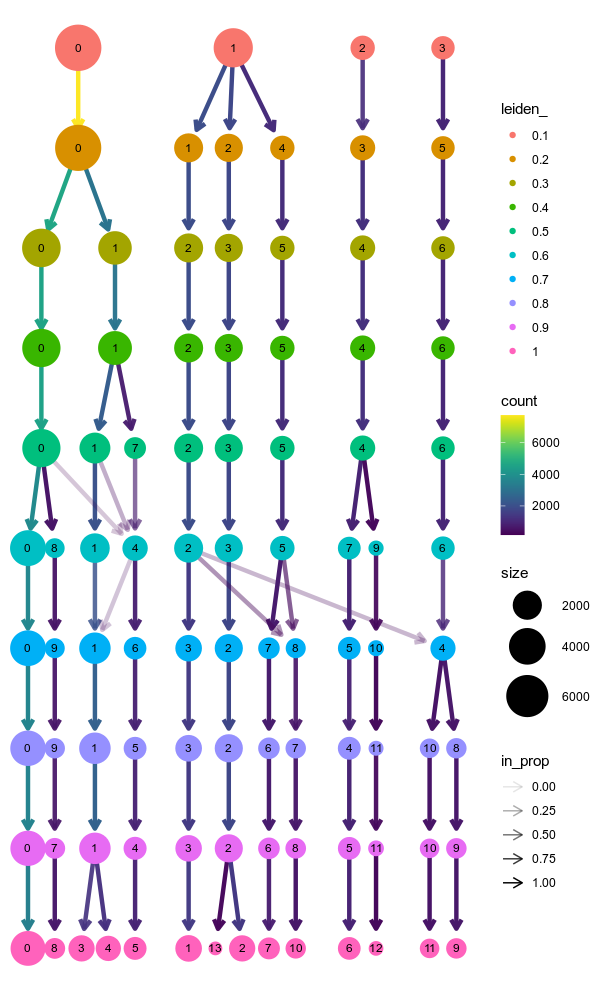

In [17]:
sctk.pp.clustree(adata, figsize=(600, 1000))

单细胞分析——如何确定合适的分辨率

https://www.jianshu.com/p/0a28b293d6dd


https://doi.org/10.1016/j.cell.2019.05.031